# Setup

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('Airlines.csv')

# Stage 1 (Analysis)

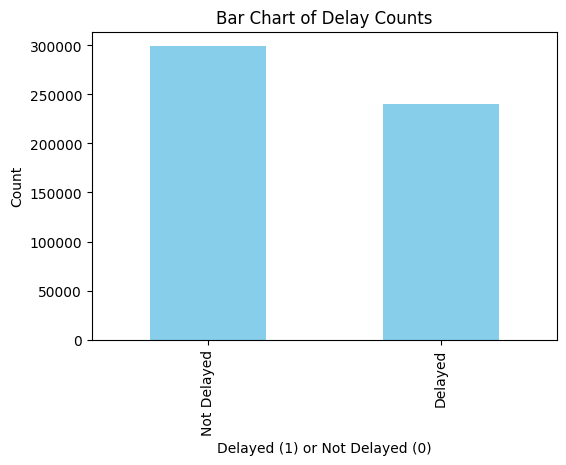

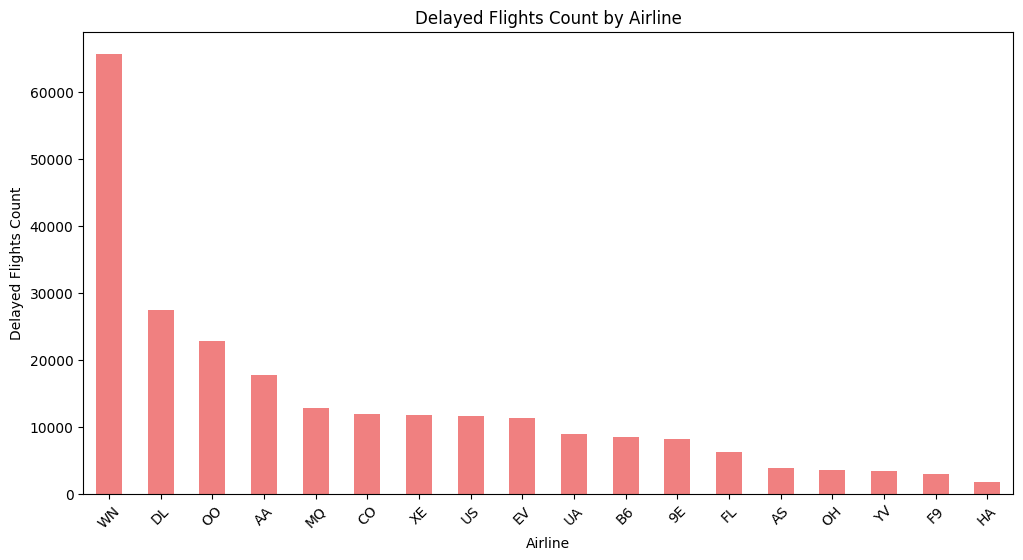

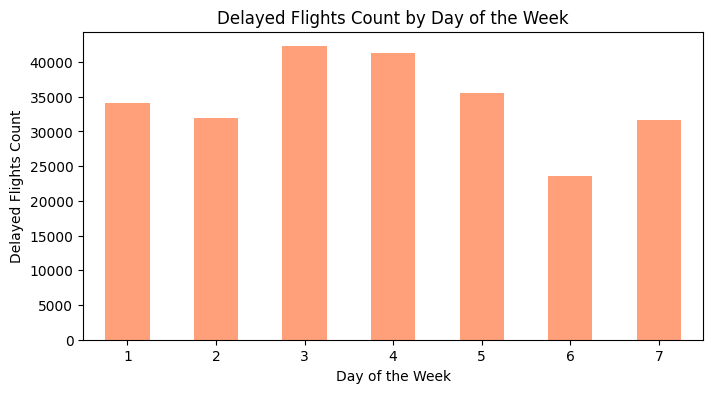

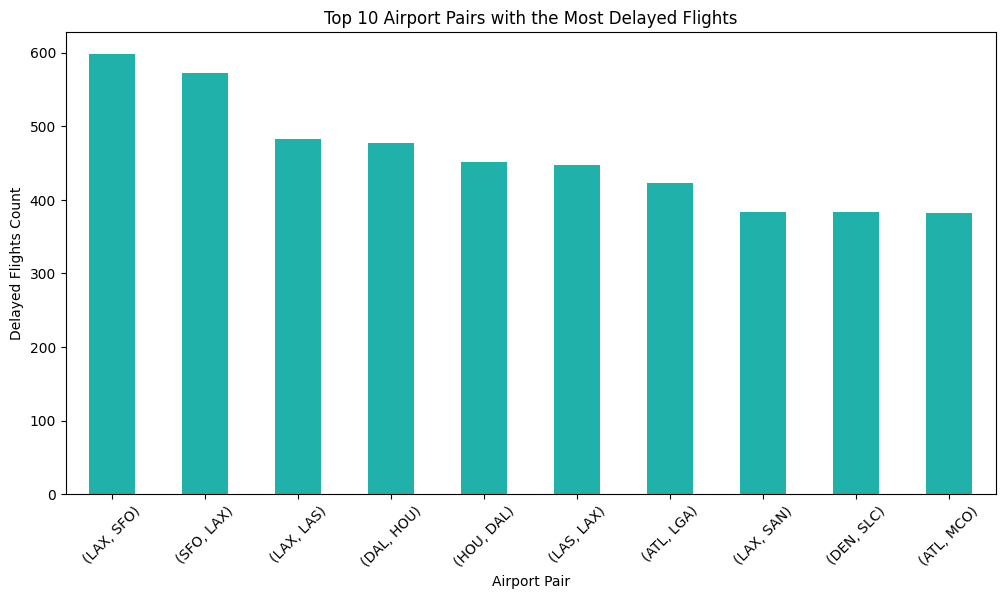

In [9]:
# 1. Bar Chart of Delay Counts
delay_counts = df['Delay'].value_counts()
plt.figure(figsize=(6, 4))
delay_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Delayed (1) or Not Delayed (0)')
plt.ylabel('Count')
plt.title('Bar Chart of Delay Counts')
plt.xticks([0, 1], ['Not Delayed', 'Delayed'])
plt.show()

# 2. Bar Chart of Airlines and Delay Counts
delay_counts_by_airline = df.groupby('Airline')['Delay'].sum()
delay_counts_by_airline = delay_counts_by_airline.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
delay_counts_by_airline.plot(kind='bar', color='lightcoral')
plt.xlabel('Airline')
plt.ylabel('Delayed Flights Count')
plt.title('Delayed Flights Count by Airline')
plt.xticks(rotation=45)
plt.show()

# 3. Bar Chart of Day of the Week vs. Delay Counts
day_delay_counts = df.groupby('DayOfWeek')['Delay'].sum()
plt.figure(figsize=(8, 4))
day_delay_counts.plot(kind='bar', color='lightsalmon')
plt.xlabel('Day of the Week')
plt.ylabel('Delayed Flights Count')
plt.title('Delayed Flights Count by Day of the Week')
plt.xticks(rotation=0)
plt.show()

# 4. Bar Chart of Airport Pairs and Delay Counts
airport_pairs_delay_counts = df.groupby(['AirportFrom', 'AirportTo'])['Delay'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
airport_pairs_delay_counts.plot(kind='bar', color='lightseagreen')
plt.xlabel('Airport Pair')
plt.ylabel('Delayed Flights Count')
plt.title('Top 10 Airport Pairs with the Most Delayed Flights')
plt.xticks(rotation=45)
plt.show()

# 5. Bar Chart of Flight Length
plt.figure(figsize=(10, 5))
plt.hist(data['Length'], bins=20, color='lightblue')
plt.xlabel('Flight Length (minutes)')
plt.ylabel('Count')
plt.title('Bar Chart of Flight Length')
plt.show()

# 6. Bar Chart of Time
plt.figure(figsize=(10, 5))
plt.hist(data['Time'], bins=20, color='lightgreen')
plt.xlabel('Time (minutes)')
plt.ylabel('Count')
plt.title('Bar Chart of Time')
plt.show()



# Stage 2 (df Preperation)

In [6]:
# Randomly split the dfFrame into two parts (e.g., 80% for train and 20% for test)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Display the first few rows of each split dfFrame
print("Training Set:")
print(df_train.head())

print("\nTesting Set:")
print(df_test.head())

Training Set:
            id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  \
498081  498082      F9     796         PDX       DEN          3   900     143   
203828  203829      WN    3586         SAN       SJC          7  1185      80   
156549  156550      AA     705         LGA       DFW          5   365     250   
66053    66054      DL    2825         BOS       MSP          6  1090     207   
165376  165377      FL    1102         CMH       RSW          5   818     150   

        Delay  
498081      0  
203828      1  
156549      1  
66053       0  
165376      1  

Testing Set:
            id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  \
442150  442151      OO    6477         SMF       LAX          7   881      85   
229730  229731      UA     310         DEN       LGA          2   665     223   
69994    69995      WN    1739         OAK       LAS          7   465      85   
414293  414294      B6    1085         JFK       CLT          5  

In [7]:
from sklearn import preprocessing

#copy for later use
df_train_preprocessed = df_train.copy()

# create a variable with the values of the target variable
df_train_target = df_train['Delay']

# and remove it from the dfframe so it only contains the features that our model should use
df_train_preprocessed = df_train.drop(columns='Delay')

# encode the target variable into a numeric value
label_encoder = preprocessing.LabelEncoder()
df_train_target = label_encoder.fit_transform(df_train_target)

# encode the Outlook and Wind features
encoder = preprocessing.OneHotEncoder()
encoded = pd.dfFrame(encoder.fit_transform(df_train_preprocessed[['Outlook', 'Wind']]).toarray(), columns=encoder.get_feature_names_out(['Outlook', 'Wind']))

df_train_preprocessed = df_train_preprocessed.drop(columns=['Outlook', 'Wind'])
df_train_preprocessed = df_train_preprocessed.join(encoded)
df_train_preprocessed

AttributeError: module 'pandas' has no attribute 'dfFrame'